In [15]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [16]:
# Parameters
T = 100  # Total time steps
dt = 1.0  # Time step 
num_sim = 20 # Number of curves to simulate

# Transition matrix A
A = np.array([
    [1, 0, dt, 0],
    [0, 1, 0, dt],
    [0, 0, 1, 0],
    [0, 0, 0, 1]
])

# Observation matrix
H = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0]
])

# Noise parameters 
sigma_pos = 0.1  # Position noise
sigma_vel = 0.01  # Velocity noise 
sigma_gps = 0.5 # GPS noise

# Process noise covariance Q
# Case 1: Position noise only, GPS jitters
Q_pos = np.array([
    [sigma_pos**2, 0, 0, 0],
    [0, sigma_pos**2, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

# Case 2: Velocity noise only, wind gusts
Q_vel = np.array([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, sigma_vel**2, 0],
    [0, 0, 0, sigma_vel**2]
])


# Measurement noise covariance R, GPS inaccuracies -> noise added to the position
R = np.array([
    [sigma_gps**2, 0],
    [0, sigma_gps**2]
])

# select noise case
Q = Q_pos # Position noise only
# Q = Q_vel # Velocity noise only

# Simulation
np.random.seed(42)  # For reproducibility

# Initialize storage arrays with correct dimensions
x_t = np.zeros((num_sim, T, 4)) # true states x_t
y_t = np.zeros((num_sim, T, 2)) # y_t noisy observation



for sim in range(num_sim):
    # Initial state x_0
    x_0 = np.array([0.0, 0.0, 0.1, 0.1]) # np.array([x_t, y_t, v_x, v_y])

    for t in range(T):
        # Save current true state
        x_t[sim, t] = x_0
        
        # generates noisy measurements
        r = np.random.multivariate_normal([0, 0], R) # measurement noise
        # Simulate measurement (GPS)
        y_t[sim, t] = H @ x_0 + r # observed position with noise 
        
        # Simulate next state 
        q = np.random.multivariate_normal([0, 0, 0, 0], Q) #process noise
        x_0 = A @ x_0 + q # updated state with noise


# Calculate average curve
avg_curve = np.mean(x_t[:, :, :2], axis=0)  # Average x,y positions across simulations
# avg_y_curve = np.mean(y_t, axis=0)  # Avg measurements

# print(x_t)
# print(measurements)

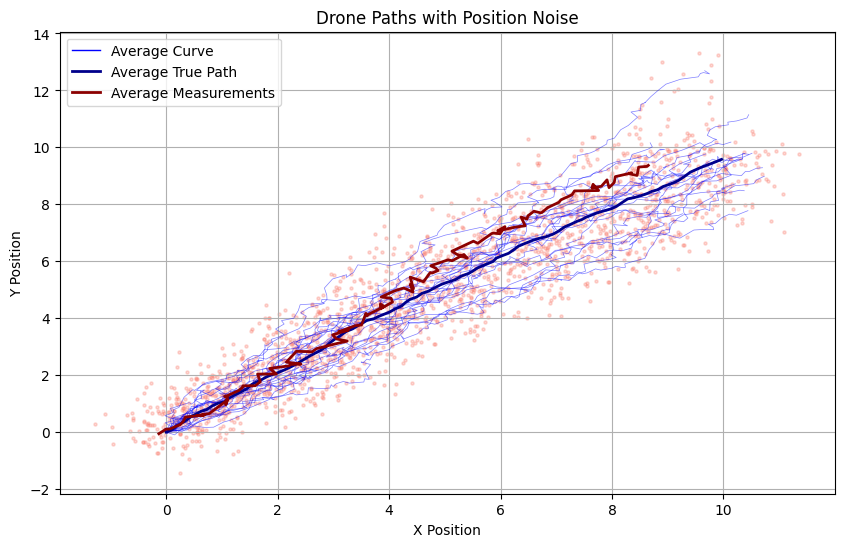

In [17]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot all individual curves
for sim in range(num_sim):
    plt.plot(x_t[sim, :, 0], x_t[sim, :, 1], 'blue', alpha=0.5, linewidth=0.5)

# Plot average curve
plt.plot(avg_curve[:, 0], avg_curve[:, 1], 'blue', linewidth=1, label='Average Curve')

# Plot individual measurements (dots)
for sim in range(num_sim):
    plt.scatter(y_t[sim, :, 0], y_t[sim, :, 1],
                color='salmon', s=5, alpha=0.3)
    
# Plot average paths
plt.plot(avg_curve[:, 0], avg_curve[:, 1], 
         'darkblue', linewidth=2, label='Average True Path')
plt.plot(avg_y_curve[:, 0], avg_y_curve[:, 1], 
         'darkred', linestyle='-', linewidth=2, label='Average Measurements')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Drone Paths with {"Position" if Q[0,0] > 0 else "Velocity"} Noise')
plt.legend()
plt.grid(True)
plt.show()

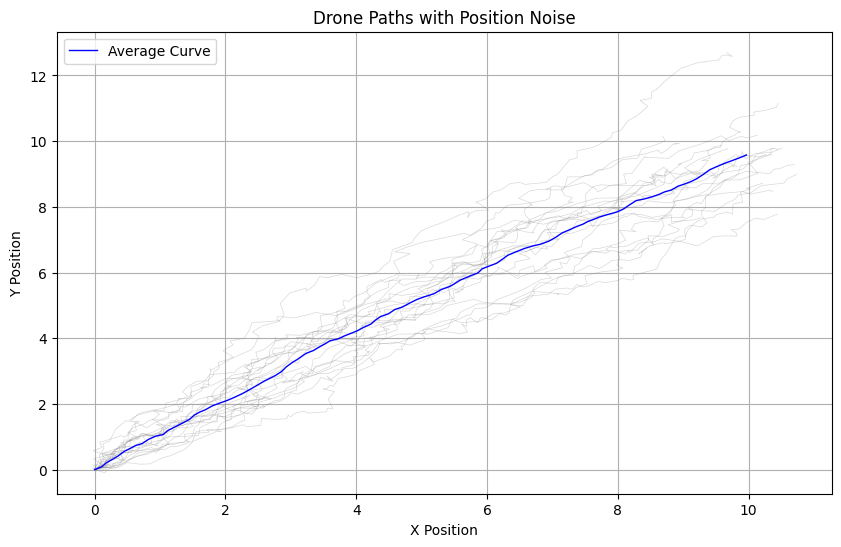

In [18]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot all individual curves
for sim in range(num_sim):
    plt.plot(x_t[sim, :, 0], x_t[sim, :, 1], 'gray', alpha=0.3, linewidth=0.5)

# Plot average curve
plt.plot(avg_curve[:, 0], avg_curve[:, 1], 'blue', linewidth=1, label='Average Curve')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Drone Paths with {"Velocity" if np.any(Q[2:]) else "Position"} Noise')
plt.legend()
plt.grid(True)
plt.show()


In [19]:
Q = Q_vel # Velocity noise only

# Simulation
np.random.seed(42)  # For reproducibility

# Initialize storage arrays with correct dimensions
x_t = np.zeros((num_sim, T, 4)) # true states x_t
y_t = np.zeros((num_sim, T, 2)) # y_t noisy observation



for sim in range(num_sim):
    # Initial state x_0
    x_0 = np.array([0.0, 0.0, 0.1, 0.1]) # np.array([x_t, y_t, v_x, v_y])

    for t in range(T):
        # Save current true state
        x_t[sim, t] = x_0
        
        # generates noisy measurements
        r = np.random.multivariate_normal([0, 0], R) # measurement noise
        # Simulate measurement (GPS)
        y_t[sim, t] = H @ x_0 + r # observed position with noise 
        
        # Simulate next state 
        q = np.random.multivariate_normal([0, 0, 0, 0], Q) #process noise
        x_0 = A @ x_0 + q # updated state with noise


# Calculate average curve
avg_curve = np.mean(x_t[:, :, :2], axis=0)  # Average x,y positions across simulations
avg_y_curve = np.mean(y_t, axis=0)  # Avg measurements

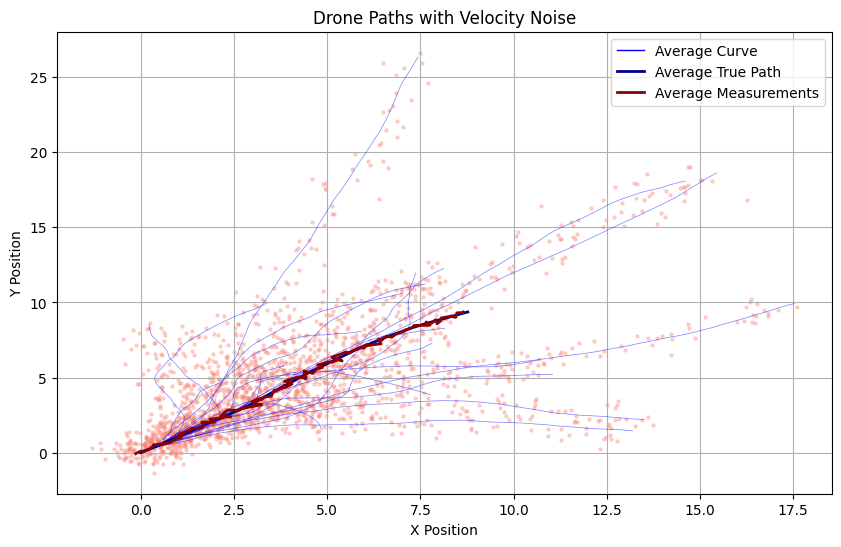

In [20]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot all individual curves
for sim in range(num_sim):
    plt.plot(x_t[sim, :, 0], x_t[sim, :, 1], 'blue', alpha=0.5, linewidth=0.5)

# Plot average curve
plt.plot(avg_curve[:, 0], avg_curve[:, 1], 'blue', linewidth=1, label='Average Curve')

# Plot individual measurements (dots)
for sim in range(num_sim):
    plt.scatter(y_t[sim, :, 0], y_t[sim, :, 1],
                color='salmon', s=5, alpha=0.3)
    
# Plot average paths
plt.plot(avg_curve[:, 0], avg_curve[:, 1], 
         'darkblue', linewidth=2, label='Average True Path')
plt.plot(avg_y_curve[:, 0], avg_y_curve[:, 1], 
         'darkred', linestyle='-', linewidth=2, label='Average Measurements')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Drone Paths with {"Position" if Q[0,0] > 0 else "Velocity"} Noise')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Simulation
np.random.seed(42)  # For reproducibility
x_t = []
measurements = []

Q = Q_vel

# Simulation
np.random.seed(42)  # For reproducibility

# Initialize storage arrays with correct dimensions
x_t = np.zeros((num_sim, T, 4))
measurements = np.zeros((num_sim, T, 2))



for sim in range(num_sim):
    # Initial state x_0
    x_0 = np.array([0.0, 0.0, 0.1, 0.1]) # np.array([x_t, y_t, v_x, v_y])

    for t in range(T):
        # Save current true state
        x_t[sim, t] = x_0
        
        # Simulate measurement (GPS)
        r = np.random.multivariate_normal([0, 0], R)
        y_t = H @ x_0 + r # observed position with noise 
        measurements[sim, t] = H @ x_0 + r
        
        # Simulate next state (with process noise)
        q = np.random.multivariate_normal([0, 0, 0, 0], Q)
        x_0 = A @ x_0 + q # updated state


# Calculate average curve
avg_curve = np.mean(x_t[:, :, :2], axis=0)  # Average x,y positions across simulations


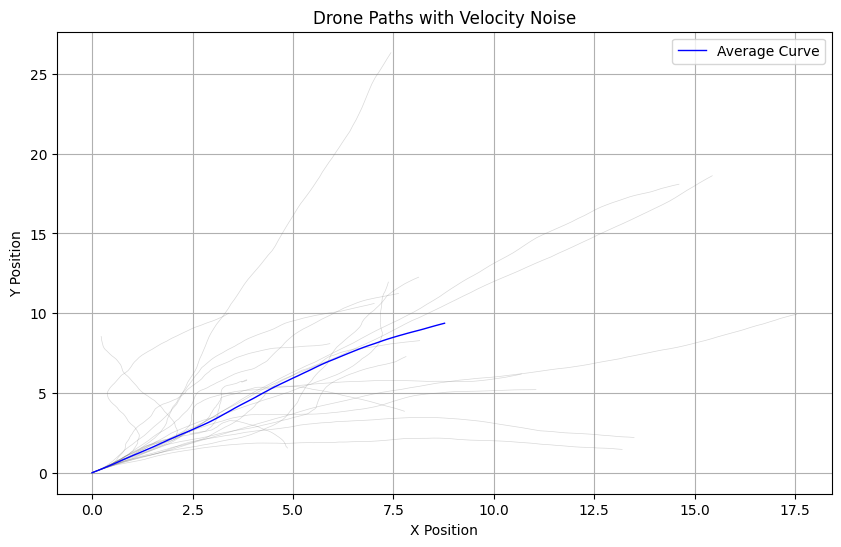

In [22]:
# Plot results
plt.figure(figsize=(10, 6))

# Plot all individual curves
for sim in range(num_sim):
    plt.plot(x_t[sim, :, 0], x_t[sim, :, 1], 'gray', alpha=0.3, linewidth=0.5)

# Plot average curve
plt.plot(avg_curve[:, 0], avg_curve[:, 1], 'blue', linewidth=1, label='Average Curve')

plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Drone Paths with {"Velocity" if np.any(Q[2:]) else "Position"} Noise')
plt.legend()
plt.grid(True)
plt.show()
